In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
ds = pd.read_csv('D:\Datasets\car_data.csv')
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
print(ds.shape)

(301, 9)


In [8]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [9]:
ds = ds.drop('Car_Name', axis=1)
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
ds['Years_old'] = 2022 - ds.Year     
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
ds.drop('Year', axis=1, inplace=True)
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [12]:
ds = pd.get_dummies(ds,drop_first=True)
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


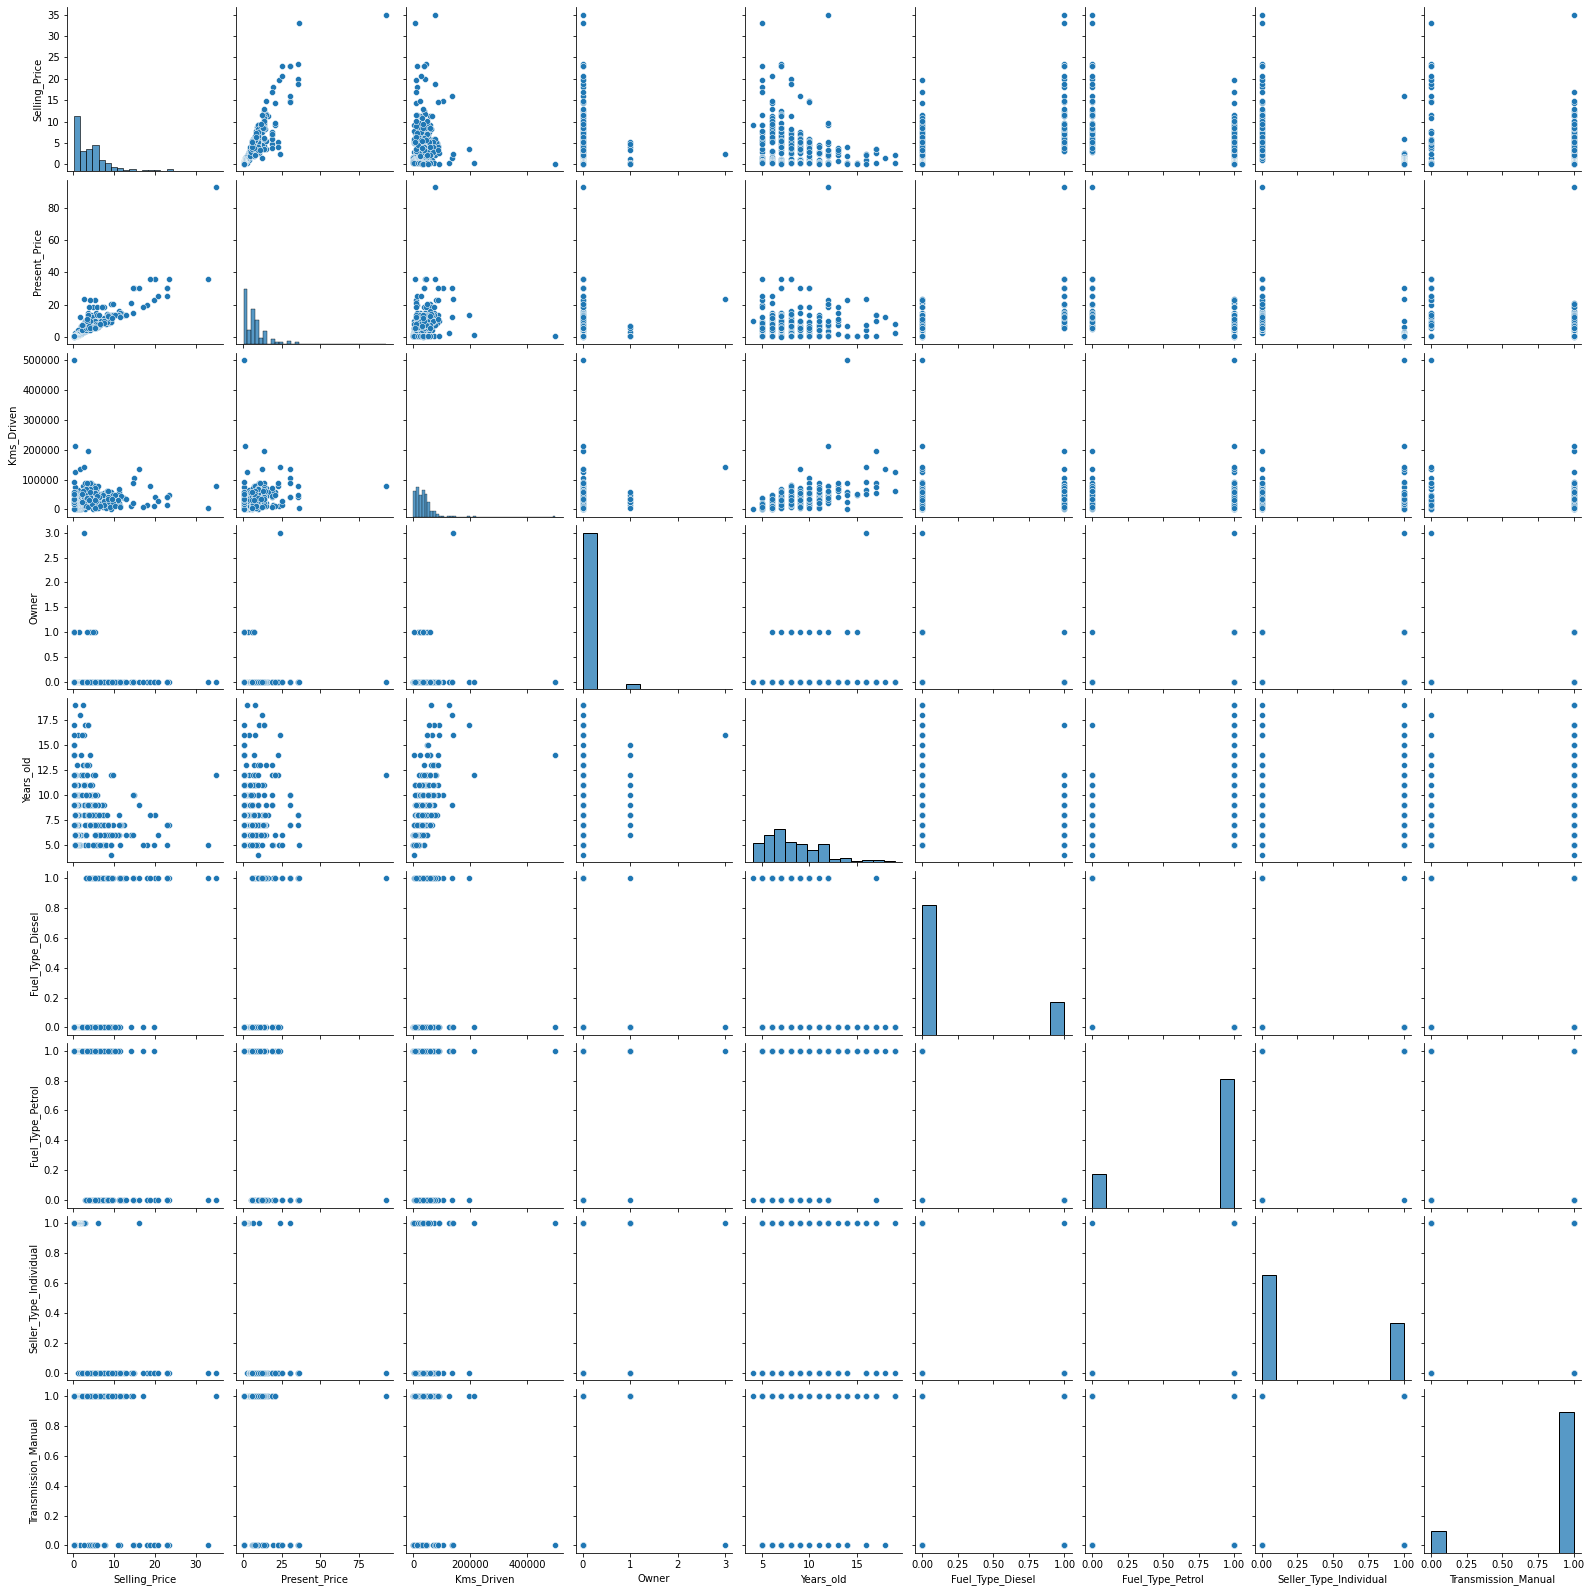

In [13]:
sns.pairplot(ds);

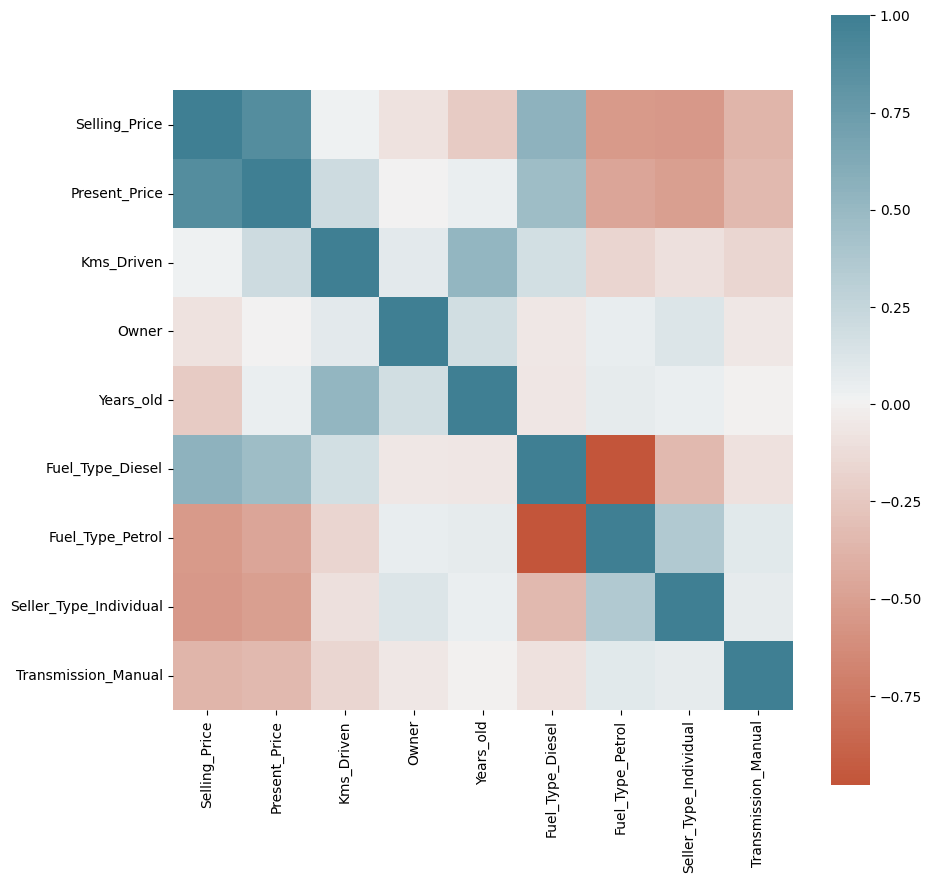

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(), 
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
);

In [15]:
X = ds.drop('Selling_Price', axis = 1)
y = ds['Selling_Price']
print(X.shape)

(301, 8)


In [16]:
print(y.shape)

(301,)


In [17]:
X.head()

,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [18]:
print(y.head())

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [19]:
from sklearn.ensemble import ExtraTreesRegressor
md = ExtraTreesRegressor()
md.fit(X,y)

ExtraTreesRegressor()

In [20]:
md.feature_importances_

array([3.64899155e-01, 3.89041014e-02, 2.52013055e-04, 7.74232633e-02,
       2.24111745e-01, 1.41229826e-02, 1.33536642e-01, 1.46750098e-01])

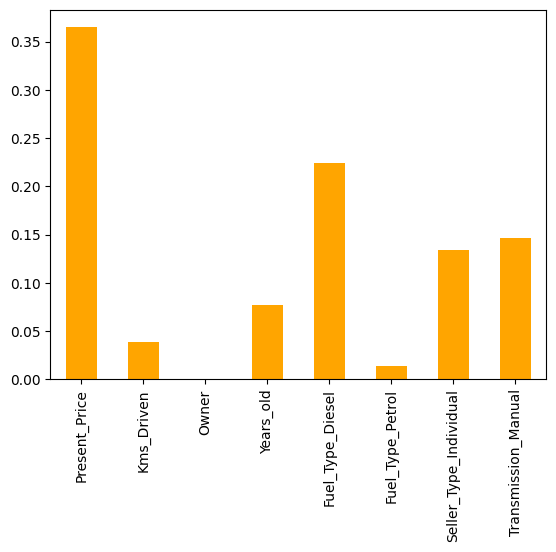

In [21]:
pd.Series(md.feature_importances_, index=X.columns).plot(kind='bar',alpha=1.0, rot=90, color='orange');

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
md = LinearRegression()

In [24]:
md.fit(X_train,y_train)
print("Accuracy:", md.score(X_test,y_test)*100,"%")

Accuracy: 91.44342972228519 %


In [25]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

In [26]:
cross_val_score(LinearRegression(), X,y,cv=cv)

array([0.9144343 , 0.81157191, 0.82958652, 0.84584462, 0.85555828])

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
def perfect_model(X, y):
    model_algo = {
      
        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        },

        'Linear_Regression':{
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(X_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [29]:
perfect_model(X, y)

C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='sq

[{'splitter': 'best', 'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'mse'}, {'normalize': False}, {'n_estimators': 140, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5}]


,model,best_score,best_params
0,Decision_Tree,0.868752,"{'splitter': 'best', 'min_samples_leaf': 5, 'm..."
1,Linear_Regression,0.850996,{'normalize': False}
2,Random_forest,0.896236,"{'n_estimators': 140, 'min_samples_split': 10,..."


In [30]:
dtr_fi_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae')
dtr_fi_model.fit(X_train,y_train)
dtr_fi_model.score(X_test,y_test)

C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


0.9398443728676312

In [31]:
rfr_fi_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
rfr_fi_model.fit(X_train,y_train)
rfr_fi_model.score(X_test,y_test)

C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.9628381174964264

In [32]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion=

array([0.93989716, 0.92368765, 0.94713869, 0.74690984, 0.91139934])

In [33]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

array([0.96122736, 0.90950318, 0.96472746, 0.86555405, 0.95879796])

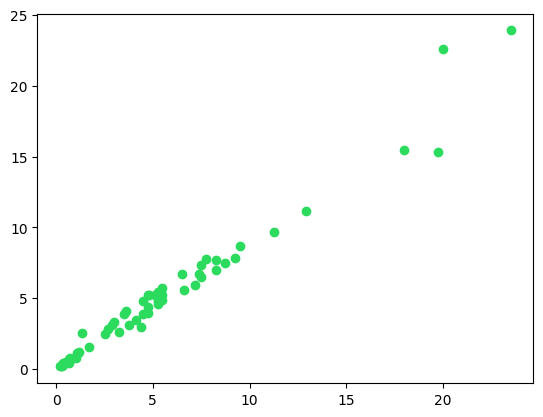

In [34]:
predictions=rfr_fi_model.predict(X_test)
plt.scatter(y_test,predictions,color='#2cdb5e')

C:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

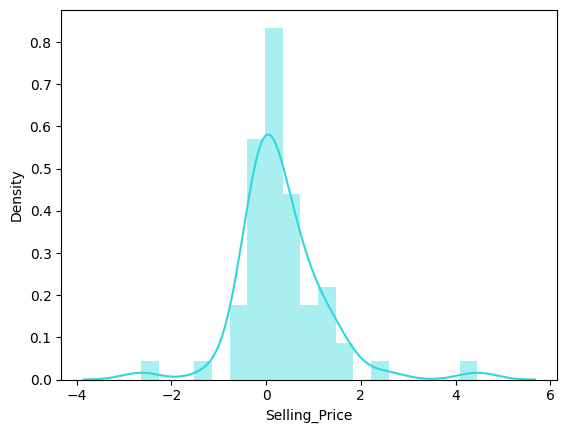

In [35]:
sns.distplot(y_test-predictions,color='#2cd8db')

In [43]:
import pickle
with open('Four.pkl', 'wb') as file:
  pickle.dump(rfr_fi_model, file)